In [3]:
import cv2
import os, glob
import mediapipe as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import random

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, ConvLSTM2D, Dropout, LSTM, Rescaling
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, Rescaling


In [22]:
X = np.load('X_train_298.npy')

In [23]:
Y = np.load('Y_train_298.npy')

In [24]:
input_shape = (10, 80, 80, 3) 
# Define the number of classes
num_classes = 2  # Example number of classes

# Create the Sequential model
model = Sequential()
model.add(Rescaling(scale=1./255, input_shape=input_shape))
# Add Conv3D layers
model.add(Conv3D(32, kernel_size=(2, 2, 2), activation='relu'))
model.add(MaxPooling3D(pool_size=(1, 2, 2)))
model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu'))
model.add(MaxPooling3D(pool_size=(1, 2, 2)))
model.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 10, 80, 80, 3)     0         
                                                                 
 conv3d_3 (Conv3D)           (None, 9, 79, 79, 32)     800       
                                                                 
 max_pooling3d_3 (MaxPooling  (None, 9, 39, 39, 32)    0         
 3D)                                                             
                                                                 
 conv3d_4 (Conv3D)           (None, 7, 37, 37, 64)     55360     
                                                                 
 max_pooling3d_4 (MaxPooling  (None, 7, 18, 18, 64)    0         
 3D)                                                             
                                                                 
 conv3d_5 (Conv3D)           (None, 5, 16, 16, 128)   

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(X, Y, batch_size=2, epochs=60)

Epoch 1/60
148/148 [==============================] - 3s 16ms/step - loss: 0.7047 - accuracy: 0.5507
Epoch 2/60
148/148 [==============================] - 2s 15ms/step - loss: 0.7246 - accuracy: 0.4764
Epoch 3/60
148/148 [==============================] - 2s 15ms/step - loss: 0.7193 - accuracy: 0.5304
Epoch 4/60
148/148 [==============================] - 2s 15ms/step - loss: 0.6920 - accuracy: 0.5473
Epoch 5/60
148/148 [==============================] - 2s 15ms/step - loss: 0.6755 - accuracy: 0.5000
Epoch 6/60
148/148 [==============================] - 2s 15ms/step - loss: 0.7137 - accuracy: 0.5000
Epoch 7/60
148/148 [==============================] - 2s 15ms/step - loss: 0.7079 - accuracy: 0.5574
Epoch 8/60
148/148 [==============================] - 2s 15ms/step - loss: 0.6965 - accuracy: 0.4932
Epoch 9/60
148/148 [==============================] - 2s 15ms/step - loss: 0.6861 - accuracy: 0.5034
Epoch 10/60
148/148 [==============================] - 2s 15ms/step - loss: 0.7046 - accura

In [ ]:
# model.save('final_model_conv_3d')

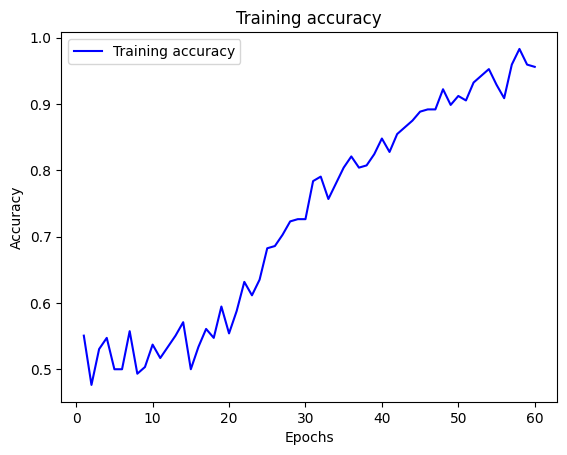

In [28]:

def plot_accuracy(history):
    # Extracting accuracy and loss values from history
    accuracy = history.history['accuracy']
    epochs = range(1, len(accuracy) + 1)

    # Plotting accuracy vs epochs
    plt.plot(epochs, accuracy, 'b', label='Training accuracy')
    plt.title('Training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    # plt.savefig('accuracy.jpg')
    plt.show()

plot_accuracy(history)


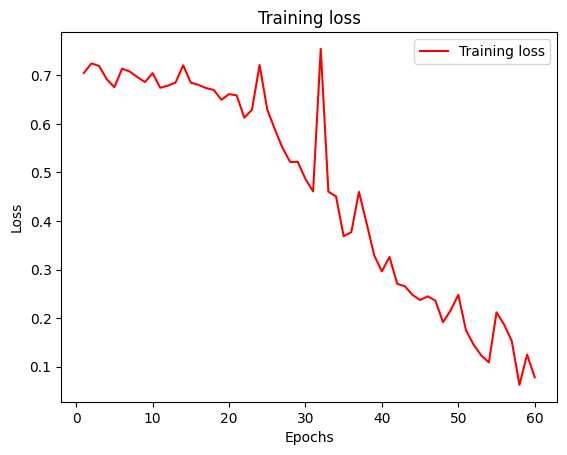

In [29]:

def plot_loss(history):
    # Extracting loss values from history
    loss = history.history['loss']
    epochs = range(1, len(loss) + 1)

    # Plotting loss vs epochs
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    # plt.savefig('loss.jpg')
    plt.show()


plot_loss(history)

In [30]:
X_test = np.load('X_test.npy')

In [31]:
Y_test = np.load('Y_test.npy')

In [37]:
model = tf.keras.models.load_model('final_model_conv_3d')

In [38]:
model.evaluate(X_test, Y_test)

4/4 [==============================] - 1s 43ms/step - loss: 0.1184 - accuracy: 0.9500


[0.11841201037168503, 0.949999988079071]

In [39]:
Y_pred = model.predict(X_test)

4/4 [==============================] - 0s 50ms/step


In [40]:
Y_lab = [np.argmax(i) for i in Y_pred]

In [41]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_lab)

In [42]:
print(report)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        50
           1       1.00      0.90      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [5]:
model_t =   tf.keras.models.load_model('final_model_conv_3d')

In [11]:
tf.keras.utils.plot_model(model_t, to_file='model.png', show_shapes=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [8]:
pip uninstall pydot

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install graphviz

In [4]:
model_t.save('final_model_conv_3d_tf', save_format = 'tf')

INFO:tensorflow:Assets written to: final_model_conv_3d_tf\assets


INFO:tensorflow:Assets written to: final_model_conv_3d_tf\assets


In [5]:
model_t.save('final_model_conv_3d_h5.h5', save_format = 'h5')